In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import math
import random
import librosa
import librosa.display
import os
import matplotlib.pyplot as plt
import soundfile as sf

## Data gathering and labeling

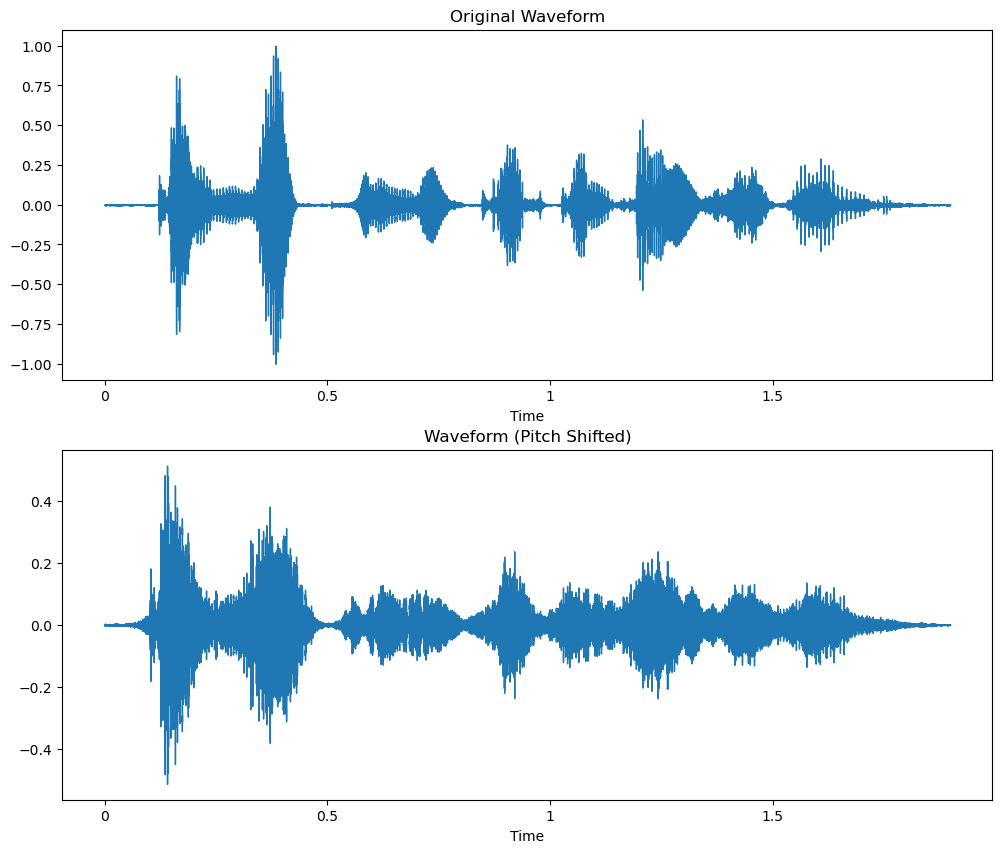

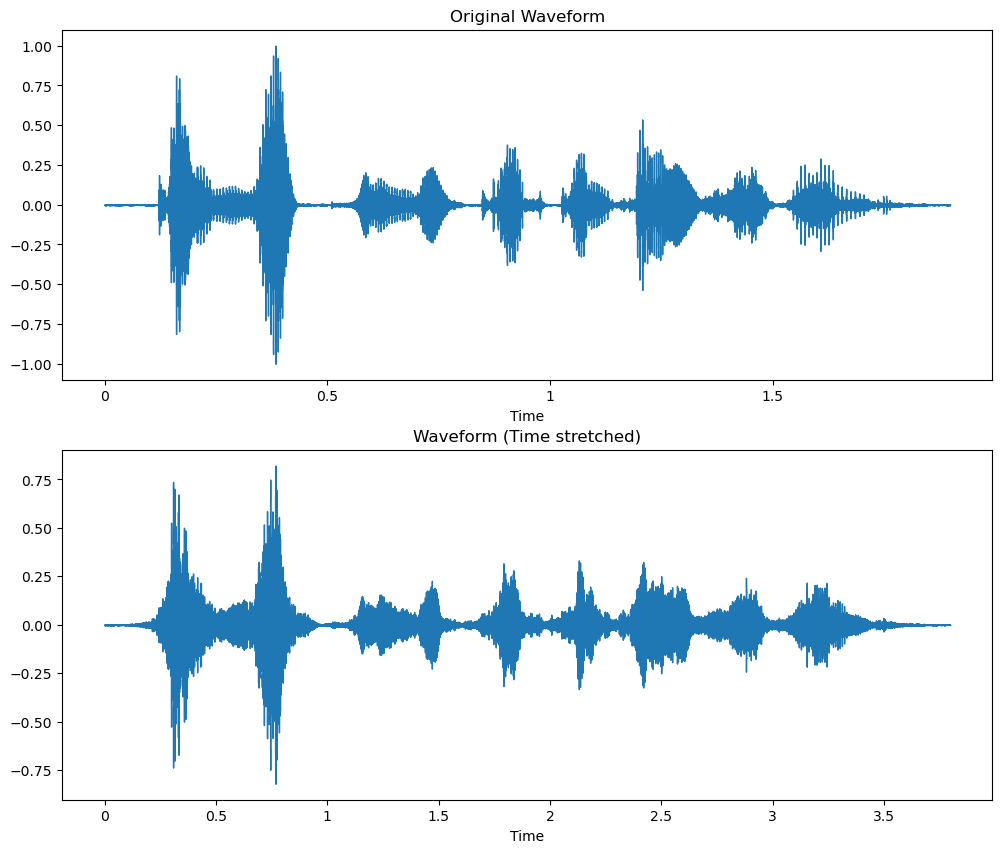

In [4]:
# An example of pitch shift and time stretch

w_ex, sr = librosa.load('data/wav/03a01Fa.wav', sr=None)
w_ex_pitch_shifted = librosa.effects.pitch_shift(w_ex, sr=sr, n_steps=3)
w_ex_time_stretched = librosa.effects.time_stretch(w_ex, rate=0.5)

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.waveshow(w_ex, sr=sr)
plt.title('Original Waveform')

plt.subplot(2, 1, 2)
librosa.display.waveshow(w_ex_pitch_shifted, sr=sr)
plt.title('Waveform (Pitch Shifted)')

plt.savefig('shift_ex', dpi=300, bbox_inches='tight')
plt.show()

plt.figure(figsize=(12, 10))
plt.subplot(2, 1, 1)
librosa.display.waveshow(w_ex, sr=sr)
plt.title('Original Waveform')

plt.subplot(2, 1, 2)
librosa.display.waveshow(w_ex_time_stretched, sr=sr)
plt.title('Waveform (Time stretched)')

plt.savefig('stretch_ex', dpi=300, bbox_inches='tight')
plt.show()

sf.write('w_ex_pitch_shifted.wav', w_ex_pitch_shifted, sr)
sf.write('w_ex_time_stretched.wav', w_ex_time_stretched, sr)


In [5]:
emo_labels = {'W': 0, 'L': 1, 'E': 2, 'A': 3, 'F': 4, 'T': 5, 'N': 6}
def get_label(file_name):
    label = file_name[5]
    return emo_labels[label]
    
def resize(w, length):
    if len(w) < length:
        return np.pad(w, (0, length - len(w)), 'constant')
    else:
        return w[:length]
        
max_length = 50000
labels = []
waveforms = []
for file_name in os.listdir('data/wav'):
    label = get_label(file_name)
    file_path = os.path.join('data/wav', file_name)   
    w, sr = librosa.load(file_path)
    for i in range(3):
        rand1 = -3 + random.random() * 6
        w_pitch_shifted = librosa.effects.pitch_shift(w, sr=sr, n_steps=rand1)
        w_pitch_shifted = resize(w_pitch_shifted, max_length)
        waveforms.append(w_pitch_shifted)
        labels.append(label)
            
        rand2 = 0.8 + random.random() * 0.4
        w_time_stretched = librosa.effects.time_stretch(w, rate=rand2)
        w_time_stretched = resize(w_time_stretched, max_length)
        waveforms.append(w_time_stretched)
        labels.append(label)

    w = resize(w, max_length)
    labels.append(label)
    waveforms.append(w)


In [6]:
df = pd.DataFrame(waveforms)
df['label'] = labels

df.columns = [f'{i}' for i in range(max_length)] + ['label']

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,49991,49992,49993,49994,49995,49996,49997,49998,49999,label
0,0.000698,0.002601,0.003313,0.001739,0.000113,0.000616,0.002149,0.002451,0.001797,0.001268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1,0.000709,0.002498,0.003366,0.002145,0.000361,0.000221,0.001621,0.002516,0.002162,0.001533,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
2,0.000714,0.002292,0.003351,0.002716,0.001047,0.000054,0.000669,0.001977,0.002525,0.002139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.000711,0.002484,0.003350,0.002140,0.000370,0.000233,0.001625,0.002511,0.002155,0.001534,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
4,0.000698,0.002598,0.003314,0.001748,0.000117,0.000605,0.002139,0.002456,0.001806,0.001273,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [8]:
X = df.iloc[:, 1:].values
y = df.iloc[:, max_length].values.astype('uint8')
X.shape, y.shape

((3745, 50000), (3745,))

In [9]:
from sklearn.model_selection import train_test_split

num_classes = len(np.unique(y))
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.5, random_state=42)
X_train.shape, y_train.shape

((2621, 50000), (2621,))

In [10]:
w_pitch_shifted = librosa.effects.pitch_shift(w, sr=sr, n_steps=-2)